# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Problem Statement

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" alt="sketch-compare-predictions" style="width: 700px;"/>

[Image credit](https://bilingua.io/how-to-say-hello-in-100-languages)


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

---

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Pre-Processing</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Evaluation and Conclusions</a>


 <a id="one"></a>
## 1. Importing Packages


---


In [17]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data


---
 

In [5]:
# Load training data
df_train = pd.read_csv('https://github.com/Gabe-Maja/SA-Language-Identification_Classification-Hackathon/blob/main/train_set.csv?raw=true')

# Load testing data 
df_test = pd.read_csv('https://github.com/Gabe-Maja/SA-Language-Identification_Classification-Hackathon/blob/main/test_set.csv?raw=true')



<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>

---



In [8]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [9]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [10]:
df_train.shape

(33000, 2)

In [11]:
df_test.shape

(5682, 2)

In [12]:
# train info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [13]:
# test info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [14]:
# check missing values in train dataset
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [15]:
# check missing values in test dataset
df_test.isnull().sum()

index    0
text     0
dtype: int64

Fortunately -- no missing values are recorded. Let's move on to pre-processing.

<a id="three"></a>
## 4. Pre-Processing
---

In [19]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    #Removal of numbers
    text = re.sub(r'\d+', ' ', text)
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [20]:
# Application of the function to clean the tweets
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [21]:
# Replace '.txt' with 'text file'
df_train["clean_text"] = df_train["clean_text"].str.replace(".txt", " text file")
df_test["clean_text"] = df_test["clean_text"].str.replace(".txt", " text file")

In [22]:
# Check changes pre-processing has done
df_train.head(20)


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [40]:
# Check changes pre-processing has done
df_test.head(20)

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...","ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,(762010101403 am) 1495 final gems birthing opt...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi: etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,u-gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused.","so, on occasion, are statistics misused."


<a id="three"></a>
## 5. Modelling
---

In [24]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Assign alias to vectorizer
vect = TfidfVectorizer()

In [25]:
# Using sparse to train the model using both representations.
#import scipy.sparse

# Defining the features as well as the label
X = df_train['clean_text']
y = df_train['lang_id']  

In [26]:
# Vectorize X-variable
X_vec = vect.fit_transform(X)

In [27]:
# Check shape of X_vec
X_vec.shape

(33000, 141958)

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In the next two cells, we will define the model names and call the model implementation classes

In [39]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Naive Bayes']

In [40]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    MultinomialNB(alpha=0.3)
]

Now its time to produce the code that will train and evaluate our various models...

In [41]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


Let's take a look at the results now

In [42]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Naive Bayes,0.999886,0.999887,0.999886,0.999886,0.999242,0.321972
Logistic Regression,0.999545,0.999546,0.999545,0.999546,0.994246,78.272687
Nearest Neighbors,0.978295,0.978523,0.978295,0.978200,0.952861,0.146259


There's quite a bit of info to process here. Let's try a more visual approach for better intepretation

<AxesSubplot:xlabel='Classifier'>

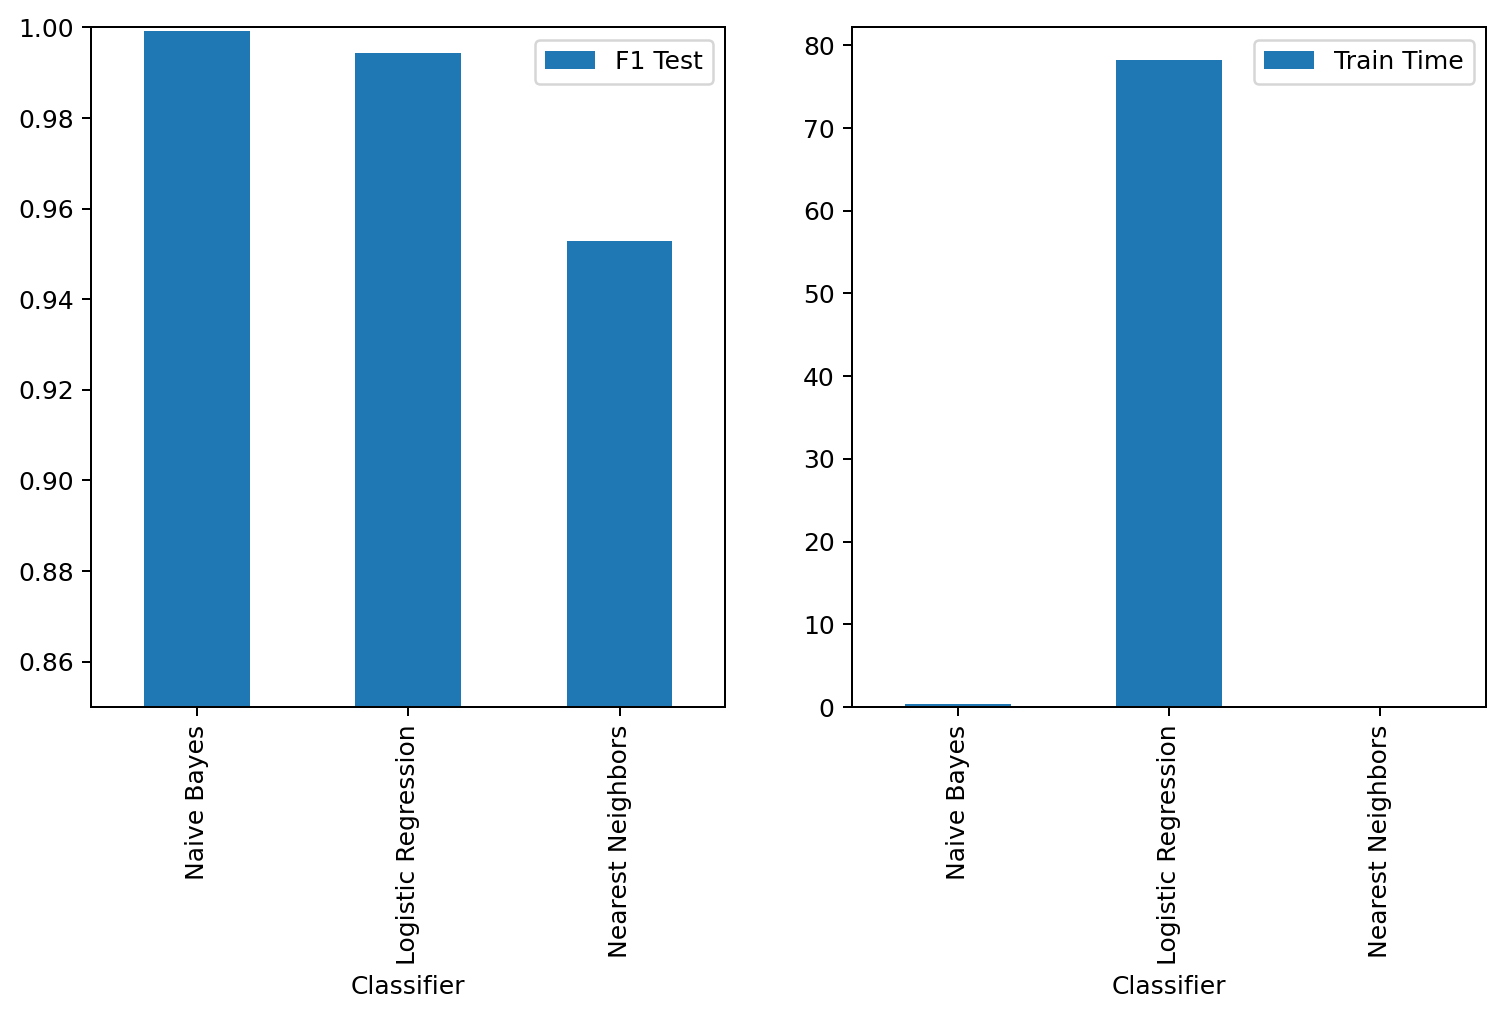

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

Now let's view the classification report of the various models:

In [54]:
print('Logistic Regression Classification Report')
print(class_report['Logistic Regression'])
print('            ------------------------------')
print('k-Nearest Neighbors Classification Report')
print(class_report['Nearest Neighbors'])
print('            ------------------------------')
print('Naive Bayes Classification Report')
print(class_report['Naive Bayes'])

Logistic Regression Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2417
         eng       1.00      1.00      1.00      2385
         nbl       1.00      1.00      1.00      2417
         nso       1.00      1.00      1.00      2375
         sot       1.00      1.00      1.00      2382
         ssw       1.00      1.00      1.00      2416
         tsn       1.00      1.00      1.00      2402
         tso       1.00      1.00      1.00      2439
         ven       1.00      1.00      1.00      2366
         xho       1.00      1.00      1.00      2391
         zul       1.00      1.00      1.00      2410

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400

            ------------------------------
k-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

     

<a id="three"></a>
## 6. Model Evaluation and Conclusions
---

From the metrics above, it is quite clear that the 'Naive Bayes' model outperforms the other two models. 

While the 'Naive Bayes' and 'Logistic Regression' models recorded very similar F1-train and F1-test scores (with 'Naive Bayes' slighlty outperfomring Logistic Regression'), the 'Naive Bayes' model has a considerably lower training time than 'Logistic Regression'. 

Similarly to the above mentioned metrics, the accuracy of the 'Naive Bayes' model once again outperforms the other two models. 

The performance of our chosen model is already more than acceptable. However, should we look to further improve the performance of this model going forward, there is an option to perform Hyper-parameter tuning on this chosen model. 